In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv('medical_examination.csv')


In [47]:
df['overweight'] = np.where(df['weight']/((df['height']/100)**2) > 25, 1, 0)


In [48]:
df['gluc'] = np.where(df['gluc'] == 1, 0, 1)
df['cholesterol'] = np.where(df['cholesterol']==1, 0, 1)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [49]:
df_cat = df[['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight']]
df_cat.head()

,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,0,0,0,1,0,0
1,1,0,0,0,1,1,1
2,1,0,0,0,0,1,0
3,0,0,0,0,1,1,1
4,0,0,0,0,0,0,0


variable


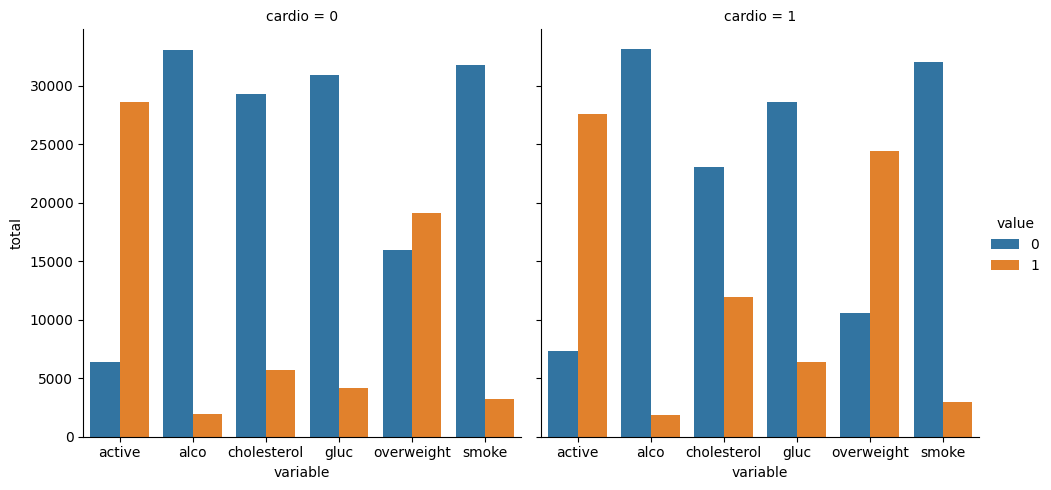

In [67]:
# 4
def draw_cat_plot():
    # 5
    df_cat = df[['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight']]


    # 6
    df_cat = pd.melt(df_cat, id_vars=['cardio'],var_name='feature', value_name='value')
    

    # 7
    df_cat_grouped = df_cat.groupby(['cardio', 'feature', 'value']).size().reset_index(name='count')
    df_cat_grouped = df_cat_grouped.rename(columns={'feature': 'variable', 'count': 'total'})



    # 8
    fig = sns.catplot(x='variable', y='total', hue='value', col='cardio', data=df_cat_grouped, kind='bar').figure
    
    ax = fig.axes[0]
    print(ax.get_xlabel())
    # 9
    fig.savefig('catplot.png')
    return fig

fig = draw_cat_plot()
plt.show()

In [ ]:
df[df['ap_lo'] <= df['ap_hi']]

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [ ]:

df_heat = df[df['height'] >= df['height'].quantile(0.025)]

Before new plot: Number of axes in figure: 0
X-axis labels from fig.axes[0]: ['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight']


<Figure size 640x480 with 0 Axes>

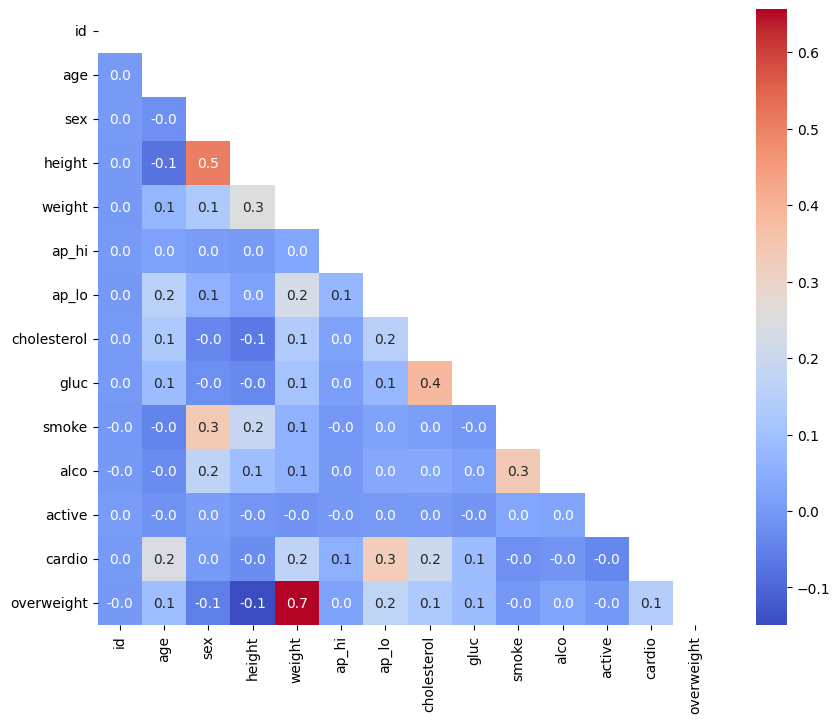

In [60]:
# 10
def draw_heat_map():
    print(f"Before new plot: Number of axes in figure: {len(plt.gcf().axes)}")
    # 11
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &  # Diastolic <= Systolic
        (df['height'] >= df['height'].quantile(0.025)) &  # Height >= 2.5th percentile
        (df['height'] <= df['height'].quantile(0.975)) &  # Height <= 97.5th percentile
        (df['weight'] >= df['weight'].quantile(0.025)) &  # Weight >= 2.5th percentile
        (df['weight'] <= df['weight'].quantile(0.975))   # Weight <= 97.5th percentile
    ]

    # 12
    corr = df_heat.corr()

    # 13
    mask = np.triu(np.ones_like(corr, dtype=bool))



    # 14
    fig, ax = plt.subplots(figsize=(10, 8))

    # 15
    sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".1f", ax=ax)
    #ax.set_title("Correlation Matrix (Upper Triangle)")

    ax_from_fig = fig.axes[0]
    
    # Get the x-axis tick labels
    xtick_labels = [label.get_text() for label in ax_from_fig.get_xticklabels()]
    
    # Print them in a format similar to your test expectation
    print(f"X-axis labels from fig.axes[0]: {xtick_labels}")
    # 16
    fig.savefig('heatmap.png')
    return fig

# Example usage (assuming your DataFrame 'df' is defined):
heatmap_plot = draw_heat_map()
plt.show()